# Toward a Further Understanding of the Relationship Between Variables
We've reviewed all the tools in statistics we need to push further into new territory. But before we start to apply this knowledge toward learning about the economic forces generating the data, we need to further develop our understanding of how statistics describes the relationship between variables. Economics describes the structural dependence between variables whereas statistics describes distributional dependence. Econometrics as about how to utilize statistics or distributional dependence to understand structural dependence. But more on this later. For now, let's retreat to the more familiar domain of statistics and distributional dependence.

We've seen a few concepts that measure this dependence, including conditional means and covariance. We will elaborate further on these concepts as we proceed to regression analysis.

# Regression
There is plenty of confusion about what regression actually means. It is sometimes referred to as any study of the conditional distribution of a variable $Y$ and a single or vector of (independent) variables $X$. This could include how the quantiles of $Y$ change with $X$. But for this class, regression analysis will be the study of the conditional mean $E[Y|X=x]$, that is, how the mean or expectation of $Y$ changes for different realizations of the random variable $X$.

We've already discussed that $E[Y|X=x]$ is just a function of $x$. We can denote this function $f(x)$ and call it the regression function.

# Linear Regression
Linear regression can equivalently be thought of as "the best linear predictor of Y given $X$," or the best linear approximation to $E[Y|X=x]$. In what sense is it best? We can define this best approximation as $g(x) = \beta_0 + \beta_1x$ where $\beta_0$ and $\beta_1$ are
$$
(\beta_0,\beta_1)  = \text{arg}\min_{b_0,b_1}E_X\big[\big(E[Y|X] - (b_0 + b_1X)\big)^2\big]
$$
$$
= \text{arg}\min_{b_0,b_1}E\big[\big(Y - (b_0 + b_1X)\big)^2\big]
$$
where the second equality follows by working out the first equality. So what exactly are $\beta_0$ and $\beta_1$ in terms of concepts we already know? Let's take FOCs of the second optimization problem. The FOC with respect to $b_1$ and evaluated at $(b_0,b_1)=(\beta_0,\beta_1)$ is
$$
2E\big[X\big(Y - (\beta_0 + \beta_1X)\big)\big] = 0
$$
$$
\implies  E[XY - \beta_0X - \beta_1X^2] = 0
$$
$$
\implies  \beta_1 = \frac{E[XY] - \beta_0E[X]}{E[X^2]}
$$
and the FOC for $b_0$ and evaluated at $(b_0,b_1)=(\beta_0,\beta_1)$ is
$$
E[Y - \beta_0 - \beta_1X] = 0
$$
$$
\implies  \beta_0 = E[Y] - \beta_1E[X]
$$
and inserting this expression for $\beta_0$ in the expression for $\beta_1$ we obtain
$$
\beta_1  = \frac{E[XY] - \left(E[Y] - \beta_1E[X]\right)E[X]}{E[X^2]}
$$
$$
= \frac{E[XY] - E[Y]E[X] + \beta_1E[X]^2}{E[X^2]}
$$
$$
\implies \beta_1  = \frac{E[XY] - E[Y]E[X]}{E[X^2] - E[X]^2} = \frac{Cov[X,Y]}{Var[X]},
$$
which is a nice expression which shows that the linear relationship between the mean of $Y$ and $X$ has a slope proportional to the covariance between the two. Thus, the covariance has a direct link to understanding the linear relationship between $Y$ and $X$. We will denote $\beta_0 + \beta_1X$ as $BLP(Y|X)$ and refer to this as the best linear predictor.

## Properties of the BLP
1. From the FOC, $E[X(Y-BLP(Y|X))] = 0$. We may sometimes define the regression residual $U=Y-BLP(Y|X)$. Thus, this condition is equivalent to $E[XU]=0$.
2. $BLP(Y|X)=\beta_0 + \beta_1X$ is a linear function of $X$, and is therefore a random variable.

# Regression using Matrix Notation
As brief aside, we'll sometimes find it useful to write everything in matrix notation. Actually, because of the ubiquity of computer use in the profession nowadays, its essential that we introduce matrix notation sooner, because the way we will work on our computers is to use vectors and matrices to represent our data.

Suppose we grouped everything, denoting the random variable $X$ with $X_1$ and redefining $X$ as the random vector $X=(1,X_1)'$ so that $X$ is now a $2\times 1$ (2 rows, 1 column) vector and define $\beta = (\beta_0, \beta_1)'$ so $\beta$ is also a $2\times 1$ vector. In this class, we will always think of a vector as a column vector, meaning a $K\times 1$ matrix. This should help you remember dimensions.

By writing $X'$ we mean the transpose of $X$. The transpose of $X$ is a $1\times 2$ vector. Define $b=(b_0, b_1)'$ and $\hat{\beta}_N$ similarly. Then we can write $\beta_0 + \beta_1X_1$ in matrix notation as $X'\beta$ in our new notation. Then our maximization problem from above would look like
$$
\max_bE[(Y - X'b)^2]
$$
and our FOCs could be very simply written as
$$
0 = E[X(Y - X'b)] =
\begin{pmatrix}
E[1\cdot(Y - X'b)] \\ E[X_1(Y - X'b)]
\end{pmatrix} =
\begin{pmatrix}
E[1\cdot(Y - b_0 - b_1X_1)] \\ E[X_1(Y - b_0 - b_1X_1)].
\end{pmatrix}
$$
What is nice about matrix notation is that we can write the solution with much greater ease. Taking the FOCs above and using $\beta$ in place of $b$, we have
$$
0  = E[X(Y - X'\beta)] = E[XY] - E[XX']\beta \implies \beta = E[XX']^{-1}E[XY]
$$
$$ = \begin{pmatrix}
E[1^2] & E[1\cdot X_1] \\
E[X_1\cdot 1] & E[X_1^2]
\end{pmatrix}^{-1}
\begin{pmatrix}
E[1\cdot Y] \\ E[X_1Y]
\end{pmatrix},
$$
which can readily be expressed to look like the solution we obtained above for $\beta_0$ and $\beta_1$.
- Note that we could have just as readily defined $X$ as an arbitrary $K\times 1$ random vector $X=(X_1,X_2,...,X_K)'$ and the above matrix notation would be exactly the same.

## Conditions Required for Regression
1. Invertibility of $E[XX']$. $E[XX']$ is a $2\times 2$ matrix and we need to be able to invert it! $E[XX']$ is invertible if and only if $X$ has no perfect collinearity, i.e., $\nexists$ a non-zero  vector $c\in\boldsymbol{R}^2$ such that $P(X'c = 0)=1$. This is just a mathy way of saying that the components of $X$ can't be linear combinations of one another for "everyone." In our example with $X=(1, X_1)$, this means that there is some variation in $X_1$, i.e., $Var[X_1]>0$. You can get this result by using the fact that the determinant of an invertible matrix is non-zero, and $det(E[XX'])=Var[X_1]$.

### Looking closer at invertibility
Why is no perfect collinearity equivalent to invertibility of $E[XX']$? Recall that a matrix is invertible if and only if it is positive definite and symmetric. $E[XX']$ is clearly symmetric. So $E[XX']$ is invertible if and only if it is positive definite. A matrix $M$ is positive definite if for all $c\neq 0$, $c'Mc>0$. In the case of $E[XX']$ this means that $c'E[XX']c>0$ for all $c\neq 0$. Let's see if we can show the equivalence between this case and our definition of no perfect collinearity.

**Proof.** $\rightarrow$. Suppose we have no perfect collinearity in $X$. Then there does not exist $c\neq 0$ such that $P(X'c=0)=1$. Therefore, for all $c\neq 0$, $P(X'c=0)<1$. Therefore, $P(X'c\neq 0)>0$. Then, using that $c'E[XX']c=E[c'XX'c]$, it must be that $E[c'XX'c]>0$ since $c'XX'c\geq 0$ (this is just a sum of squares) and $P(X'c\neq 0)>0$. $\leftarrow$ Now suppose $E[XX']$ is invertible. Then it is positive definite and symmetric. Thus, for all $c\neq 0$, $c'E[XX']c>0$. Furthermore, $E[c'XX'c]>0$. But since $c'XX'c\geq 0$, in order for the strict inequality to hold, we must have $P(X'c\neq 0) > 0$. Therefore, $P(X'c=0)<1$ for $c\neq 0$. Or, $\nexists c$ such that $P(X'c=0)=1$.

### Equivalent conditions for invertibility
Suppose $W$ is a square, $K\times K$ matrix. The following conditions are equivalent to $W$ being invertible.
1. If we further assume that $W$ is symmetric, then $W$ is invertible if and only if it is positive definite, where positive definite means for all $c\neq 0$, $c'Wc>0$.
2. $W$ has non-vanishing determinant, i.e., $det(W)\neq 0$
3. All eigenvalues of $W$ are positive, where an eigenvalue $\lambda$ is such that $Wc=\lambda c$ for some $c\neq 0$. 
4. $rank(W)=row(W)=col(W)=K$, where $row(\cdot)$ and $col(\cdot)$ denote the dimension of the row and column spaces (i.e., the number of linearly independent rows and columns), respectively. These are sometimes called the row or column ranks of the matrix. This condition is sometimes called "the full rank condition."

To understand invertibility of matrices, it is important to first remember the definition of invertibility for a function and then to notice that matrices can be considered linear mappings (i.e., linear functions). The intuition of invertibility of a matrix follows from recalling that a linear function is invertible if it is a bijective linear mapping. When a matrix is square and has full rank, then it is a bijective linear mapping, and therefore has an inverse.

Why is a matrix is linear mapping? Consider a $N\times K$ matrix $W$. You can take any vector $c$ of length $N$ and right multiply it by $W$ to obtain a vector of length $K$, e.g, $c'W = v$ for some $N\times 1$ vector $c$ and $K\times 1$ vector $v$. Thus, $W$ just represents a function $f:\boldsymbol{R}^N\to\boldsymbol{R}^K$. In order for $f$ to be bijective, it needs to be one-to-one and onto, which translates into the matrix $W$ representing $f$ to be square and have columns/rows that are linearly independent.

### Quick example of non-invertibility
Let $X=(1,X_1,X_2)'$ where $X_1$ takes on a value of 1 if male and 0 if female and $X_2$ takes a value of 1 if female and 0 if male. Thus, you can interpret $X_1$ as a binary indicator for male and $X_2$ as a binary indicator for female. Let $c=(-1, 1, 1)'$. Then $X'c=-1 + X_1 + X_2$ but since $X_1=1-X_2$, then $X'c = -1 + (1-X_2) + X_2 = 0$. Thus, we have shown $\exists$ c such that $P(X'c=0)=1$, and there is perfect collinearity in $X$. Therefore $E[XX']$ is not invertible.

## Estimators of the Linear Regression Function
Now how would we go about finding estimators for $\beta_0$ and $\beta_1$? Going back to our lesson on constructing estimators, we learned three approaches: replacing population moments with their sample counterparts, least squares and maximum likelihood. We noticed that all three approaches happened to achieve the same results. We will obtain similar results when estimating the linear regression function.

### Using Sample Moments as Estimates of Population Moments
Then we obtain estimators
$$
\hat{\beta}_{1,N}  = \frac{\frac{1}{N}\sum_{i=1}^N(Y_i - \bar{Y}_N)(X_i - \bar{X}_N)}{\frac{1}{N}\sum_{i=1}^N(X_i - \bar{X}_N)^2} = \frac{\hat{\sigma}_{XY}}{\hat{\sigma}_X^2}
$$
$$
\hat{\beta}_{0,N}  = \bar{Y}_N - \hat{\beta}_{1,N}\bar{X}_N.
$$
We next show that using least squares we obtain the same result as above.

### The Ordinary Least Squares (OLS) Estimator
Suppose we have a sample of data $(Y_i,X_i)_{i=1}^N$. Similar to our previous experience with least squares, let's solve the following problem:
$$
\min_{b_0,b_1}\sum_{i=1}^N\big(Y_i - (b_0 + b_1X_i)\big)^2.
$$
Taking FOCs w.r.t $b_0$ and $b_1$ and letting $\hat{\beta}_{0,N}$ and $\hat{\beta}_{1,N}$ denote our estimators, we have
$$
2\sum_{i=1}^NX_i(Y_i - \hat{\beta}_{0,N} - \hat{\beta}_{1,N}X_i) = 0
$$
$$
\sum_{i=1}^N(Y_i - \hat{\beta}_{0,N} - \hat{\beta}_{1,N}X_i) = 0,
$$
which, solving for $\hat{\beta}_{0,N}$ and $\hat{\beta}_{1,N}$ we obtain
$$
\hat{\beta}_{1,N} = \frac{\frac{1}{N}\sum_{i=1}^N(Y_i - \bar{Y}_N)(X_i - \bar{X}_N)}{\frac{1}{N}\sum_{i=1}^N(X_i - \bar{X}_N)^2} = \frac{\hat{\sigma}_{XY}}{\hat{\sigma}_X^2}
$$
$$
\hat{\beta}_{0,N} = \bar{Y}_N - \hat{\beta}_{1,N}\bar{X}_N.
$$
which is exactly what we got by replacing sample moments for their population counterparts in the expressions for $\beta_0$ and $\beta_1$. 

### The OLS Estimator using Matrix Notation

Just as we did above to define $\beta$, we can now define $\hat{\beta}_N$ using matrix algebra. Denote $X_i=(1, X_{1,i})'$ as a $2\times 1$ vector. Our problem is to solve
$$
\min_b\sum_{i=1}^N(Y_i - X_i'b)^2
$$
Taking FOCs and taking $\hat{\beta}_N$ as our maximizer, we obtain
$$
0  = \sum_{i=1}^NX_i(Y_i - X_i'\hat{\beta}_N) = \sum_{i=1}^NX_iY_i - \sum_{i=1}^NX_iX_i'\hat{\beta}_N
$$
$$
\implies \hat{\beta}_N  = \left(\sum_{i=1}^NX_iX_i'\right)^{-1}\sum_{i=1}^NX_iY_i
$$
$$ = \begin{pmatrix}
\sum_{i=1}^N1^2 & \sum_{i=1}^NX_{1,i} \\
\sum_{i=1}^NX_{1,i} & \sum_{i=1}X_{1,i}^2
\end{pmatrix}^{-1}
\begin{pmatrix}
\sum_{i=1}^NY_i \\ \sum_{i=1}^NX_{1,i}Y_i.
\end{pmatrix}
$$
We can show that we obtain the same answer as above for $\hat{\beta}_{0,N}$ and $\hat{\beta}_{1,N}$

#### Sample Conditions for Regression Estimation
1. $\sum_{i=1}^NX_iX_i'$ must be invertible! In order to be invertible, we must have no perfect collinearity in $X_i$. In practice, when we use actual realizations of $X_i$ (i.e., data) then we just need that there are at least two unique values of $X_{1,i}$ in the data (otherwise $X_{1,i}$ would be perfectly collinear with a constant!)

### The OLS Estimator Using (Super) Matrix Notation
A well versed student of linear algebra would look at what we did above and think we could go one step further. Indeed, we can. Now let $\boldsymbol{X}$ denote an $N\times K$ matrix where each row $i$ is $X_i'=(1, X_{1,i})$. Let $\boldsymbol{Y}$ denote an $N\times 1$ vector.

We talked previously how matrix notation can be useful because we will write code that utilizes matrices and vectors. This is especially true with our (super) matrix notation. Below you'll see that writing computer code that estimates linear regression parameters using OLS will be surprisingly simple! An important note: in this class, we will always think of matrices as having the number of observations $N$ as the number of rows.

Our least squares optimization problem now looks like
$$
\min_b (\boldsymbol{Y}-\boldsymbol{X}b)'(\boldsymbol{Y}-\boldsymbol{X}b)
$$
Taking FOCs we obtain
$$
0 = \boldsymbol{X}'(\boldsymbol{Y} - \boldsymbol{X}\hat{\beta}_N)
$$
$$
\implies \hat{\beta}_N = (\boldsymbol{X}'\boldsymbol{X})^{-1}\boldsymbol{X}'\boldsymbol{Y}
$$
$$
= \left(
\begin{pmatrix}
1 & 1 & \cdots & 1 \\
X_{1,1} & X_{1,2} & \cdots & X_{1,N}
\end{pmatrix}
\begin{pmatrix}
1 & X_{1,1} \\
1 & X_{1,2} \\
\vdots & \vdots \\
1 & X_{1, N}
\end{pmatrix}
\right)^{-1}
\begin{pmatrix}
1 & 1 & \cdots & 1 \\
X_{1,1} & X_{1,2} & \cdots & X_{1,N}
\end{pmatrix}
\begin{pmatrix}
Y_1 \\ Y_2 \\ \vdots \\ Y_N
\end{pmatrix}
$$
$$ = \begin{pmatrix}
1 + 1 + \cdots 1 & 1\cdot X_{1,1} + 1\cdot X_{1,2} + \cdots 1\cdot X_{1,N} \\
1\cdot X_{1,1} + 1\cdot X_{1,2} + \cdots 1\cdot X_{1,N} & X_{1,1}^2 + X_{1,2}^2 + \cdots X_{1,N}^2
\end{pmatrix}^{-1}
\begin{pmatrix}
1\cdot Y_1 + 1\cdot Y_2 + \cdots + 1\cdot Y_N \\
X_{1,1}Y_1 + X_{1,2}Y_2 + \cdots + X_{1,N}Y_N
\end{pmatrix}
$$
$$ = \begin{pmatrix}
\sum_{i=1}^N1^2 & \sum_{i=1}^NX_{1,i} \\
\sum_{i=1}^NX_{1,i} & \sum_{i=1}X_{1,i}^2
\end{pmatrix}^{-1}
\begin{pmatrix}
\sum_{i=1}^NY_i \\ \sum_{i=1}^NX_{1,i}Y_i.
\end{pmatrix}
$$

#### Sample Conditions for Regression Estimation
1. $\boldsymbol{X}'\boldsymbol{X} = \sum_{i=1}^NX_iX_i'$ needs to be invertible, as before.

## Estimating Your First Regression
We will simulate data from a joint distribution of $X$ and $Y$ such that $\beta_0=2$ and $\beta_1=10$. Then we will see if our estimates of these regression parameters is close to the truth.

In [47]:
sim_data = function(N, b0=2, b1=10, x.var=1, x.mean=3, noise.var=20){
    
    x = rnorm(N, mean=x.mean, sd=sqrt(x.var))
    noise = rnorm(N, mean=0, sd=sqrt(noise.var))
    y = b0 + b1*x + noise
    
    return(cbind(y, rep(1, N), x))
}

set.seed(210)
data = sim_data(N=25)
data[1:5,]

y,,x
28.10027,1,3.030109
44.11410,1,4.243059
19.10097,1,2.470715
27.46297,1,2.409526
31.40854,1,2.908111


In [48]:
Y = data[,1]
X = data[,2:3]
b_hat = solve(t(X)%*%X)%*%t(X)%*%Y
b_hat = c(b_hat)
b_hat

[1] 4.417234 9.402939

Looks like our estimates are not too close to the true value of $\beta$. But this is likely because we simulated a really small sample of data. Shortly, we explore what happens to the estimates when we increase the sample size. 

But for now we ask, what are we doing when obtaining this estimator? We can take a closer look graphically.

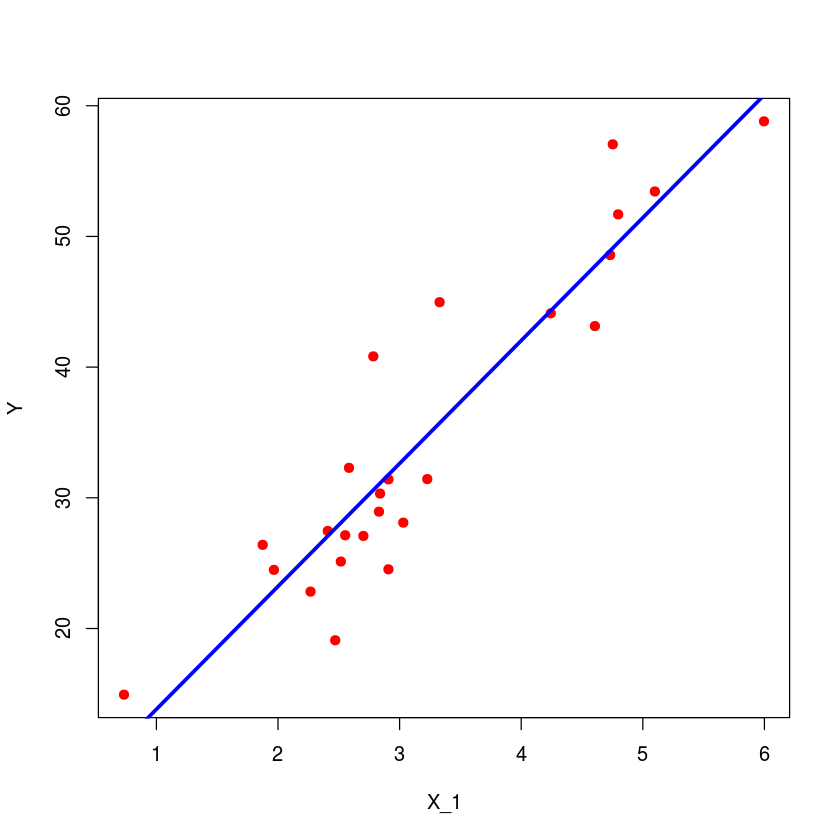

In [49]:
plot(x=data[,3], y=data[,1], xlab="X_1", ylab="Y", bg="red", pch=21,
    col="red")
lines(x=seq(min(data[,3]), max(data[,3]), length.out=100), 
      y=b_hat[1] + b_hat[2]*seq(min(data[,3]), max(data[,3]), length.out=100),
      col="blue", lwd=3)

The line is fit to minimize the average distance between itself and the data. 

# Multiple Linear Regression
We have covered the case where we've regressed $Y$ on a single regressor $X_1$ and a constant. This is univariate regression. But luckily, we've already explored regression by writing $X=(1,X_1)'$ as a vector. So now, just think that we have more regressors so that $X=(1,X_1,X_2,...,X_K)$ is a $K+1$ vector, i.e., that we have $K$ total regressors. Writing with $i$ subscripts this is $X_i = (1, X_{1,i},...,X_{K,i})'$.

Because we have already solved for the linear regression parameters when $X_i$ is a vector, the math is the same, except the matrices and vectors are of a higher dimension. We still have $\beta = E[XX']^{-1}E[XY]$ where $X$ is now a $(K+1)\times 1$ vector. The OLS estimator of $\beta$ is (in super matrix notation) $\hat{\beta}_N = (\boldsymbol{X}'\boldsymbol{X})^{-1}\boldsymbol{X}'\boldsymbol{Y}$ where $\boldsymbol{X}$ is now an $N \times (K+1)$ matrix. Note that $K=1$ is the univariate case from above.

The main insight from multiple (or multivariate) linear regression is the interpretation of the parameters and how the parameters can change with the introduction of more explanatory variables. To help explain the intuition, let's consider the case when $K=2$, so that we have two explanatory variables, $X_{1,i}$ and $X_{2,i}$, and $X_i = (1, X_{1,i}, X_{2,i})'$. 

## Interpreting Regression Coefficients from Multiple Regression: The Frisch-Waugh Theorem
Suppose that the linear regression of $Y$ on $X_1$ and $X_2$ can be denoted as $\beta_0 + \beta_1X_1 + \beta_2X_2$ or $X'\beta$ where $X\equiv (1, X_1, X_2)$. Next consider the linear regression of $Y$ on $X_2$, denoted $BLP(Y|X_2)$ and the linear regression of $X_1$ on $X_2$ as $BLP(X_1|X_2)$. Let the residual from these regressions be defined as $U \equiv Y - X'\beta$, $\tilde{Y} \equiv Y - BLP(Y|X_2)$ and $\tilde{X}_1\equiv X_1 - BLP(X_1|X_2)$. By properties of BLP, $E[XU] = E[U] = E[\tilde{X}_1] = E[\tilde{Y}] = E[\tilde{X}_1X_2] = E[\tilde{Y}X_2]=0$. 

It turns out, we can interpret $\beta_1$ as the slope coefficient of a regression of $\tilde{Y}$ on $\tilde{X}_1$. Why? Let's prove it! Let $\tilde{\beta}_1$ be the slope coefficient from a regression of $\tilde{Y}$ on $\tilde{X}_1$.
$$
\tilde{\beta}_1  = \frac{Cov[\tilde{Y},\tilde{X}_1]}{Var[\tilde{X}_1]} = \frac{E[\tilde{Y}\tilde{X}_1]}{E[\tilde{X}_1^2]}
$$
$$
= \frac{E[(Y - BLP(Y|X_2))\tilde{X}_1]}{E[\tilde{X}_1^2]} = \frac{E[Y\tilde{X}_1]}{E[\tilde{X}_1^2]}
$$
$$
= \frac{E[(\beta_0 + \beta_1X_1 + \beta_2X_2 + U)\tilde{X}_1]}{E[\tilde{X}_1^2]}
$$
$$
= \beta_1\frac{E[X_1\tilde{X}_1]}{E[\tilde{X}_1^2]} = \beta_1\frac{E[(\tilde{X}_1 + BLP(X_1|X_2))\tilde{X}_1]}{E[\tilde{X}_1^2]}
$$
$$
= \beta_1\frac{E[\tilde{X}_1\tilde{X}_1]}{E[\tilde{X}_1^2]} = \beta_1.
$$
What we have just done is to show that $\beta_1$ is the (linear) "effect" of $X_1$ on $Y$ after "controlling" (linearly) for $X_2$. This result is known as the **Frisch-Waugh theorem**.

One can also prove that the OLS estimator corresponding to these quantities is also the same, i.e., 
that
$$
\hat{\tilde{\beta}}_{1,N} = \frac{\sum_{i=1}^N(\hat{\tilde{Y}}_i - \bar{\tilde{Y}}_N)(\hat{\tilde{X}}_{1,i} - \bar{\tilde{X}}_{1,N})}{\sum_{i=1}^N(\hat{\tilde{X}}_{1,i} - \bar{\tilde{X}}_{1,N})^2} = \hat{\beta}_{1,N}
$$
where $\hat{\tilde{Y}}_i$ is the estimated residual of a regression of $Y$ on $X_2$ and $\hat{\tilde{X}}_{1,N}$ is the estimated residual of a regression of $X_1$ on $X_2$. To see this, let's do a Monte Carlo exercise, calculating estimates of the regression by first using a single regression and second by separately regression $Y$ and $X_1$ on $X_2$, and then doing residual regression. Let 
$$
\begin{pmatrix}
X_1 \\ X_2 
\end{pmatrix} \sim
\mathcal{N}
\left(\begin{pmatrix}
1 \\ 2
\end{pmatrix},
\begin{pmatrix}
1 & 0.5 \\ 0.5 & 2
\end{pmatrix}
\right),
$$
$N=1000$ and $U = Y - BLP(Y|X_1,X_2)\sim \mathcal{N}(0,10)$ and $\beta=(2, 3, 4)'$.

In [54]:
library(MASS)
sim_data2 = function(N) {
    mean = c(1, 2)
    cov = cbind(c(1, 0.5), c(0.5, 2))
    x = mvrnorm(N, mu=mean, Sigma=cov)
    x = cbind(rep(1, N), x)
    noise = rnorm(N, mean=0, sd=sqrt(10))
    
    b = c(2, 3, 4)
    dim(b) <- c(3, 1)
    
    y = x%*%b + noise
    
    cbind(y, x)
}

N = 1000
set.seed(210)

# simulating data
data = sim_data2(N)

reg = function(Y, X){solve(t(X)%*%X)%*%t(X)%*%Y}
res = function(Y, X){Y - X%*%reg(Y, X)}

# One regression procedure
Y = data[, 1]
X = data[, 2:4]
b = reg(Y, X)
b[2]

[1] 3.165283

In [55]:
# two regression procedure
X1 = data[, 3]
X2 = data[, c(2, 4)]

# Step 1: get residuals
# residual of Y on X2
Y.til = res(Y, X2)

# residual of X1 on X2
X1.til = res(X1, X2)

# Step 2: regress residuals on residuals
X.til = cbind(rep(1, N), X1.til)
b.til = reg(Y.til, X.til)

b.til[2]

[1] 3.165283

We obtain numerically identical estimates using both procedures.

# Relationship between Multivariate and Univariate Regression Parameters
Now that we've introduced multivariate regression, we can ask an additional question which will help us in the future. Consider the linear regression of $Y$ on $X_1$, denoted $BLP(Y|X_1) = \beta_0 + \beta_1X_1$. How would $\beta_1$ change if we had included $X_2$ in the regression?

To answer this question, write the linear regression of $Y$ on $X_1$ and $X_2$ as $BLP(Y|X_1,X_2)=\gamma_0 + \gamma_1X_1 + \gamma_2X_2$ and define the residual of this regression as $U = Y - BLP(Y|X_1,X_2)$. Recall that $U$ has the property that $E[U] = E[X_1U] = E[X_2U] = 0$. 

Our question reduces to, what is the relationship between $\beta_1$ and $\gamma_1$?
\begin{align}
\beta_1 & = \frac{Cov[Y,X_1]}{Var[X_1]} = \frac{Cov[\gamma_0 + \gamma_1X_1 + \gamma_1X_2 + U,X_1]}{Var[X_1]} \\
& = \gamma_1 + \gamma_2\frac{Cov[X_1,X_2]}{Var[X_1]},
\end{align}
so that $\beta_1=\gamma_1$ if $\gamma_2=0$ or $Cov[X_1,X_2]=0$.

# Measure of Fit: The R-Squared
How much of the variance in $Y$ is explained by the variation in $X$? We can answer this question by looking at the $R^2$:
$$
R^2 = \frac{\beta'Var[X]\beta}{Var[Y]} = 1 - \frac{Var[U]}{Var[Y]},
$$
where $U$ is defined as $U = Y - X'\beta$. We can estimate this with
$$
R^2_N = 1 - \frac{\sum_{i=1}^N\hat{U}_i^2}{\sum_{i=1}^N(Y_i - \bar{Y}_N)^2} = 1 - \frac{\sum_{i=1}^N(Y_i - X_i'\hat{\beta}_N)^2}{\sum_{i=1}^N(Y_i - \bar{Y}_N)^2}
$$
or utilize an unbiased estimator, called the adjusted $R^2$, denoted $\bar{R}^2_N$,
$$
\bar{R}^2_N = 1 - \frac{N - 1}{N - K - 1}\frac{\sum_{i=1}^N\hat{U}_i^2}{\sum_{i=1}^N(Y_i - \bar{Y}_N)^2}
$$
where $K$ is the number of regressors. In our example above, $K=2$. The advantage of the estimator $R^2_N$ is that it is bound between $0$ (no variance explained by $X$) and $1$ (all of the variance explained by $X$). But this also means that it must be biased, since our estimator will have almost zero probability of being exactly $0$. Another drawback of using $R^2$ is that adding an additional explanatory variable always increases the $R^2$, even if this variable adds no new "real" information for explaining variance in $Y$. This is why the adjusted $R^2$, $\bar{R}^2_N$ is often used, as it penalizes the addition of more variables to the regression.

Let's calculate $R^2_N$ and $\bar{R}^2_N$ for the data we simulated and compare it to the truth. Since $Var[U] = 10$ and
$$
Var[Y] = Var[\beta_0 + \beta_1X_1 + \beta_2X_2 + U] = \beta_1^2Var[X_1] + \beta_2^2Var[X_2] + 2\beta_1\beta_2Cov[X_1,X_2] + Var[U]
$$
$$
= 9\cdot 1 + 16\cdot 2 + 2\cdot12\cdot 0.5 + 10 = 63
$$
then the true $R^2=1 - \frac{Var[U]}{Var[Y]} = 1 - \frac{10}{63} = 53/63$.

In [56]:
53/63

[1] 0.8412698

In [57]:
U = res(Y, X)
R2 = 1 - sum(U^2)/sum((Y - mean(Y))^2)
R2.adj = 1 - ((N - 1)/(N - 3))*sum(U^2)/sum((Y - mean(Y))^2)
c(R2, R2.adj)

[1] 0.8588550 0.8585719